<a href="https://colab.research.google.com/github/tigrannh/Data-Science-ML-projects/blob/main/KerasMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [ ]:
train, test = tf.keras.datasets.mnist.load_data()

In [ ]:
len(train)

2

In [ ]:
train[0].shape

(60000, 28, 28)

In [ ]:
train[1].shape

(60000,)

In [ ]:
test[0].shape

(10000, 28, 28)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

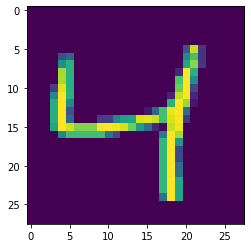

In [ ]:
plt.imshow(train[0][2])

In [ ]:
x_train = np.reshape(train[0], (60000,-1))

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
y_train = train[1]

In [ ]:
x_test = np.reshape(test[0], (10000,-1))

In [ ]:
x_test.shape

(10000, 784)

In [ ]:
y_test = test[1]

In [ ]:
#mi dzev karucelu hamar
model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Dense(100, activation="relu", ))

In [ ]:
model.add(tf.keras.layers.Dense(10))

In [ ]:
#NN has parameters
784*100 + 100 + 10*100 + 10

79510

In [ ]:
model.build(input_shape=(None, 784))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#partadir chi keras-ov u=anel, uxxaki poqr baner arag anum e
#Sparse Cat Crossentr- takic on e hot encoding e anum ev heto havakanayanin veltori het lossy hashvum
#frok _logits = True chenq dnum True, apa piti poxancne q havanakanayin vektor, hakaarak depqum takic anum e
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits="True")

In [ ]:
model.compile(optimizer="adam", loss=loss, metrics=["accuracy"])

In [ ]:
output = model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 3.2738 - accuracy: 0.8385 - val_loss: 0.6280 - val_accuracy: 0.8761
Epoch 2/10
600/600 [==============================] - 2s 4ms/step - loss: 0.4837 - accuracy: 0.8946 - val_loss: 0.4277 - val_accuracy: 0.9083
Epoch 3/10
600/600 [==============================] - 2s 4ms/step - loss: 0.3261 - accuracy: 0.9200 - val_loss: 0.3544 - val_accuracy: 0.9182
Epoch 4/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2520 - accuracy: 0.9328 - val_loss: 0.3105 - val_accuracy: 0.9276
Epoch 5/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2145 - accuracy: 0.9420 - val_loss: 0.2864 - val_accuracy: 0.9386
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1952 - accuracy: 0.9471 - val_loss: 0.2728 - val_accuracy: 0.9363
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1722 - accuracy: 0.9518 - val_loss: 0.2494 - val_accuracy: 0.9439
Epoch 

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2217 - accuracy: 0.9509


[0.2217138409614563, 0.9509000182151794]

In [ ]:
#h5 compress e anum
model.save("KerasMnist.h5")

In [ ]:
x_train[:1].shape

(1, 784)

In [ ]:
model(x_train[:1])

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[33.09762 , 45.977154, 51.953503, 86.98181 , 14.251741, 98.14676 ,
        18.548975, 56.72096 , 67.2479  , 70.49838 ]], dtype=float32)>

In [ ]:
tf.nn.softmax(model(x_train[:1]))

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[5.6170836e-29, 2.2030389e-23, 8.6799559e-21, 1.4161810e-05,
        3.6715531e-37, 9.9998581e-01, 2.6984517e-35, 1.0209333e-18,
        3.8088222e-14, 9.8278037e-13]], dtype=float32)>

In [ ]:
y_train[0]

5

In [ ]:
output.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
output.history["loss"]

[3.273768186569214,
 0.4837067723274231,
 0.32609307765960693,
 0.25203824043273926,
 0.21446414291858673,
 0.19524583220481873,
 0.1722140908241272,
 0.16375015676021576,
 0.15900003910064697,
 0.14701157808303833]